**Christou Nektarios - Machine Learning 2022-2023 NKUA**


*   https://github.com/nekcht
*   https://www.nekcht.com



<p align="justify">This notebook presents implementations and experiments for various classical Machine Learning techniques, such as Ordinary Least Squares, Ridge Regression, Expectation Maximization, Full Bayesian Inference, Bayes Classifiers, kNN, and MLP. It's important to note that these implementations were created from scratch. The work within this notebook is directly related to a homework assignment for my MSc in Machine Learning, where I provided step-by-step solutions and explanations for each method.</p>

In [1]:
# imports and settings
import re
import random
import numpy as np
import pandas as pd
import scipy.stats as sta
from scipy.stats import norm
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from sklearn import datasets, preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)
# a numpy setting to ignore warnings
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# **Ordinary Least Squares & Ridge Regression**

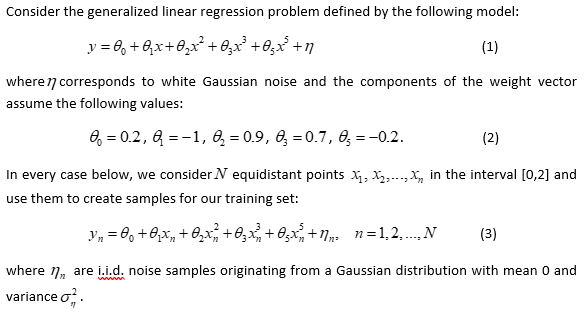

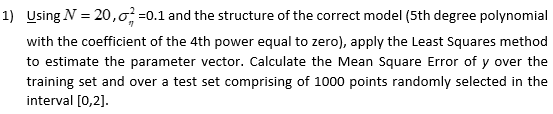

Let's define some useful functions.

In [2]:
def poly(X, poly_degree):
    """
    Generate the feature matrix 'Phi' (φ) of degree 'poly_degree', with an
    appended column of ones.

    Parameters:
        X:              1-dimensional numpy array of equidistant points (floats).
        poly_degree:    Degree of the output features (x^1, x^2, x^3, ..., x^k),
                        where the 4th power is excluded.

    Returns:
        Phi matrix of shape (Nxk) where N is the number of data points.
    """
    N = len(X)
    Phi = []

    for x in X:
        feature_vector = [x**i for i in range(1, poly_degree + 1) if i != 4]  # Exclude the 4th power
        feature_vector.append(1)  # Append a 1 as the last column
        Phi.append(feature_vector)

    return np.array(Phi)

def create_noise(var, mu, N):
    """
    Create a 1-dimensional numpy array of random noise sampled from a Gaussian
    distribution.

    Parameters:
        var:    Variance of the noise distribution (float).
        mu:     Mean of the noise distribution (float).
        N:      Number of elements in the noise vector.

    Returns:
        1-dimensional numpy array with N elements.
    """
    std = np.sqrt(var)
    noise = np.random.normal(mu, std, size=N)

    return noise

def gen_targets(Phi, weights, noise):
    """
    Generate the corresponding target values (y) with added noise.

    Parameters:
        Phi:        NxK dimensional matrix generated by the poly() function.
        weights:    Coefficients vector of the generating function of y.
        noise:      Noise vector added to y.

    Returns:
        1-dimensional numpy array of target values.
    """
    y = np.dot(Phi, weights) + noise

    return y

def least_squares(Phi, y):
    """
    Perform Ordinary Least Squares regression.

    Parameters:
        Phi:    NxK numpy array generated by the poly() function.
        y:      Vector with the corresponding targets of Phi.

    Returns:
        Coefficient vector (theta).
    """
    theta = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y

    return theta

def ridge_regression(Phi, y, l):
    """
    Perform Ridge (L2) Regression.

    Parameters:
        Phi:    NxK numpy array with the data samples.
        y:      Vector with the corresponding targets.
        l:      Regularization factor (float).

    Returns:
        Coefficient vector (theta).
    """
    theta = np.linalg.inv(Phi.T @ Phi + l * np.eye(Phi.shape[1])) @ Phi.T @ y

    return theta

def mse(y, y_pred):
    """
    Calculate the Mean Squared Error (MSE).

    Parameters:
        y:          Vector with the real target values.
        y_pred:     Vector with the predicted values.

    Returns:
        MSE (float).
    """
    MSE = np.mean((y - y_pred) ** 2)

    return MSE


In [3]:
# Generate 20 equidistant data points in the interval (0, 2)
X_train = np.linspace(0, 2, 20)

# Transform data to 5th-degree polynomial space
poly_degree = 5
Phi_true = poly(X_train, poly_degree)

# Define the true weights for the polynomial
weights_true = np.array([-1, 0.9, 0.7, -0.2, 0.2])

# Create noise with a variance of 0.1 and mean of 0
noise = create_noise(var=0.1, mu=0, N=20)

# Generate target values by applying the true weights and adding noise
targets = gen_targets(Phi_true, weights_true, noise)

Generate a plot of the clean data (without noise):

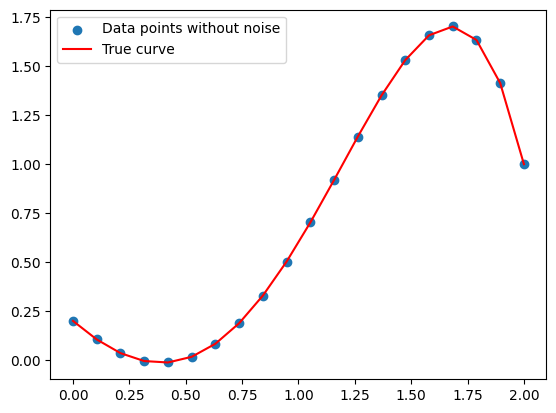

In [4]:
# Generate the true data points (without noise) using the given weights
y_true = gen_targets(Phi_true, weights_true, 0)

# Create a scatter plot of the data points without noise
plt.scatter(X_train, y_true, label='Data points without noise')

# Overlay the true curve in red
plt.plot(X_train, np.dot(Phi_true, weights_true), c='r', label='True curve')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Generate a plot of the data with added noise:

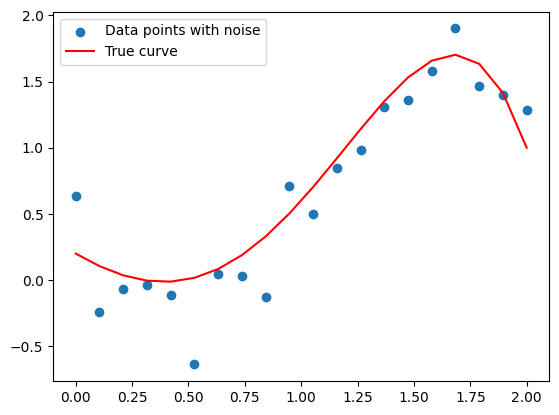

In [5]:
# Create a scatter plot of the data points with added noise
plt.scatter(X_train, targets, label='Data points with noise')

# Overlay the true curve in red
plt.plot(X_train, np.dot(Phi_true, weights_true), c='r', label='True curve')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Creating a Test Set:

In [6]:
# Generate 1000 randomly selected data points in the interval (0, 2)
X_test = [np.random.uniform(0, 2) for i in range(1000)]

# Transform the test data to a 5th-degree polynomial space
Phi_test = poly(X_test, poly_degree=5)

# Create noise for the test set with a variance of 0.1 and a mean of 0
noise = create_noise(var=0.1, mu=0, N=1000)

# Generate target values for the test set by applying the true weights and adding noise
y_test = gen_targets(Phi_test, weights_true, noise)

**Ordinary Least Squares**

In [7]:
# Calculate coefficients using the Least Squares Method
theta = least_squares(Phi_true, targets)

# Calculate MSE for the training set
y_pred = np.dot(Phi_true, theta)
mse_true_lsm = mse(targets, y_pred)

# Calculate predictions for the test set
y_pred_ = np.dot(Phi_test, theta)

# Calculate MSE for the test set
mse_test_lsm = mse(y_test, y_pred_)

In [8]:
print("MSE on Training set: " + str(mse_true_lsm))
print("MSE on Test set: " + str(mse_test_lsm))

MSE on Training set: 0.03756410340855406
MSE on Test set: 0.13172493861571816


As expected, the MSE on the test set is higher than the MSE on the training set. Because our model is the same with the function that generated the data, we get a very low MSE as expected, taking in mind that we'll have minimum variance and because LSM is unbiased, this will might aswell be the MVUE.



---



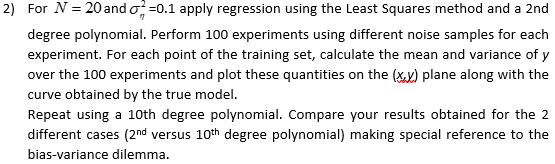

Conduct 100 experiments with varying noise levels:

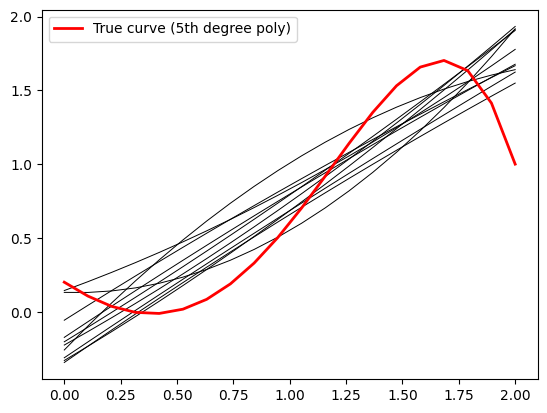

In [9]:
pred = []
plt.figure(1)

for i in range(100):
    # Generate data with noise for each experiment
    y = gen_targets(Phi_true, weights_true, create_noise(var=0.1, mu=0, N=20))

    # Fit a 2nd-degree model
    Phi_2nd = poly(X_train, poly_degree=2)
    theta = least_squares(Phi_2nd, y)
    y_pred = np.dot(Phi_2nd, theta)

    # Save the results to a list
    pred.append(y_pred)

    # Plot the fitted line for every 10th experiment
    if i % 10 == 0:
        plt.plot(X_train, np.dot(Phi_2nd, theta), c='k', linewidth=0.7)

# Plot the true curve vs. 10 out of the 100 fitted lines (to observe bias and variance)
plt.plot(X_train, np.dot(Phi_true, weights_true), c='r', label='True curve (5th degree poly)', linewidth=2)
plt.legend()

# Calculate the mean and variance of the fitted lines
pred_mean_2nd = np.mean(pred, axis=0)
pred_variance_2nd = np.var(pred, axis=0)

Let's try with a 10th degree polynomial:

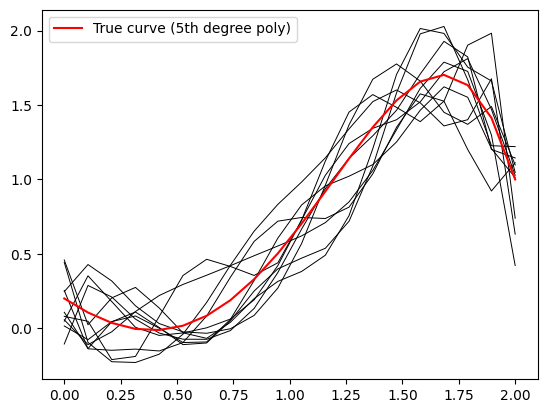

In [10]:
pred = []

for i in range(100):
    # Generate data with noise for each experiment
    y = gen_targets(Phi_true, weights_true, create_noise(var=0.1, mu=0, N=20))

    # Fit a 10th-degree model (4th power is excluded)
    Phi_10th = poly(X_train, poly_degree=10)
    theta = least_squares(Phi_10th, y)
    y_pred = np.dot(Phi_10th, theta)

    # Save the results to a list
    pred.append(y_pred)

    # Plot the fitted line for every 10th experiment
    if i % 10 == 0:
        plt.plot(X_train, np.dot(Phi_10th, theta), c='k', linewidth=0.7)

# Plot the true curve vs. 10 out of the 100 fitted lines (to observe bias and variance)
plt.plot(X_train, np.dot(Phi_true, weights_true), c='r', label='True curve (5th degree poly)', linewidth=1.5)
plt.legend()

# Calculate the mean and variance of the fitted lines
pred_mean_10th = np.mean(pred, axis=0)
pred_variance_10th = np.var(pred, axis=0)

In the plot above, we observe a significantly lower bias (indicating potential overfitting) with noticeable sudden spikes, which will be addressed by regularization. However, the 10th-degree model exhibits a higher variance compared to the 2nd-degree model.

The following plot reaffirms that the 10th-degree polynomial exhibits higher variance compared to the 2nd-degree polynomial.

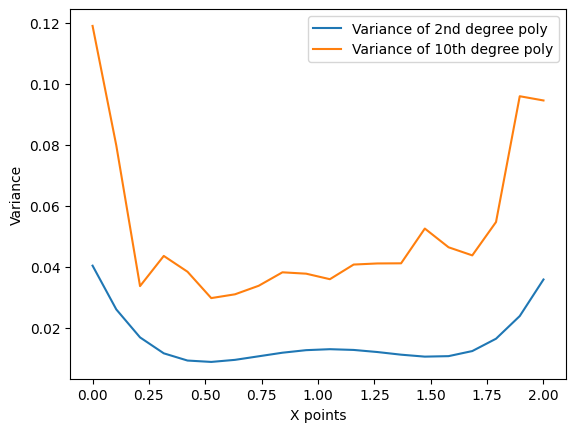

In [11]:
# Compare variances of 2nd and 10th-degree models
plt.plot(X_train, pred_variance_2nd, label='Variance of 2nd degree poly')
plt.plot(X_train, pred_variance_10th, label='Variance of 10th degree poly')

plt.xlabel('X points')
plt.ylabel('Variance')
plt.legend()



---



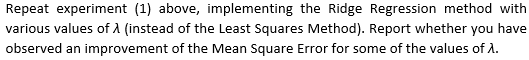

**Ridge Regression**

In [12]:
# Choose a range of values λ to experiment on
el = np.linspace(0.0001, 3, 10000)

results = []

for l in el:
    # Ridge Regression with λ
    theta = ridge_regression(Phi_true, targets, l)

    # Predict on the training data
    y_pred = np.dot(Phi_true, theta)
    MSE_train = mse(targets, y_pred)

    # Predict on the test data
    y_pred_test = np.dot(Phi_test, theta)
    MSE_test = mse(y_test, y_pred_test)

    # Append results
    results.append((l, MSE_train, MSE_test))

# Transform the results to a dataframe
df = pd.DataFrame(results, columns=['λ', 'MSE-train', 'MSE-test'])

# Find λ values with lower MSE-test than Least Squares
better_mse = []

for _, row in df.iterrows():
    if row['MSE-test'] < mse_test_lsm:
        better_mse.append(row)

# Get the top 5 λ values
results = sorted(better_mse, key=lambda t: t[2])[:5]
df = pd.DataFrame(results, columns=['λ', 'MSE-train', 'MSE-test'])

In [13]:
print('Ordinary Least Squares:')
print(f'\tMSE-train: {mse_true_lsm:.4f}')
print(f'\tMSE-test: {mse_test_lsm:.4f}')

print('\nRidge Regression for different λ (best 5 results):')
print(df)

mse_test_rr = float(df.iloc[0]['MSE-test'])
mse_train_rr = float(df.iloc[0]['λ'])
best_l = float(df.iloc[0]['MSE-train'])

print(f'\nWith Ridge Regression and λ={best_l:.4f}, the lowest MSE-test is {mse_test_rr:.4f} and MSE-train {mse_train_rr:.4f}')


Ordinary Least Squares:
	MSE-train: 0.0376
	MSE-test: 0.1317

Ridge Regression for different λ (best 5 results):
            λ  MSE-train  MSE-test
868  0.260517   0.057799  0.118175
869  0.260817   0.057810  0.118175
867  0.260217   0.057787  0.118175
870  0.261117   0.057821  0.118175
866  0.259917   0.057776  0.118175

With Ridge Regression and λ=0.0578, the lowest MSE-test is 0.1182 and MSE-train 0.2605


As expected, by shrinking the norm of the theta vector, and thus limiting the search space of theta, we get a slighlty higher MSE on the training set but a lower MSE on the test set and thus we got better generalization.

# **Full Bayesian Inference**

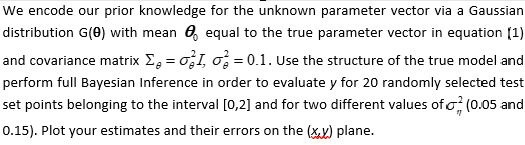

In [14]:
def Bayesian_Inference(noise_var, Phi, targets, alpha):
    """
    Bayesian Regression.

    Parameters:
    - noise_var: Variance of the noise in the generative process.
    - Phi: Design matrix.
    - targets: Target values.
    - alpha: Prior precision.

    Returns:
    - m_preds: Mean predictions.
    - s_preds: Variance predictions.
    - std_preds: Standard deviation predictions.
    - ys_all: Sampled predictions.
    """
    # Generative process: p(t|W,X,beta) = N(t|XW+b,beta)
    beta = noise_var

    # Prior: N(w|0,1/alpha*I)
    alpha = alpha

    # Posterior: N(w|m,s):
    diag = np.diag([1/alpha for i in range (Phi.shape[1])])
    s = np.linalg.inv(diag + np.dot(1/beta, Phi.T @ Phi))
    m = np.dot(1/beta, (s @ np.dot(Phi.T, targets)))

    # Infer p(t|t,alpha,beta) - the predictive distribution
    m_preds = []
    s_preds = []
    std_preds = []
    ys_all = []

    for x in Phi:
        m_pred = np.dot(x.T, m)
        s_pred = beta + (beta * alpha * np.dot(x.T, np.dot(s, x)))
        std_pred = np.sqrt(s_pred)
        ys = np.random.normal(m_pred, std_pred)

        # Append results
        m_preds.append(m_pred)
        s_preds.append(s_pred)
        std_preds.append(std_pred)
        ys_all.append(ys)

    # Transform results to numpy arrays
    m_preds = np.array(m_preds)
    s_preds = np.array(s_preds)
    std_preds = np.array(std_preds)
    ys_all = np.array(ys_all)

    return m_preds, s_preds, std_preds, ys_all

def generate_data(noise_var, N):
    """
    Generate Data Function

    Parameters:
    - noise_var: Variance of the noise in the data.
    - N: Number of data points to generate.

    Returns:
    - Phi: Design matrix.
    - targets: Target values.
    - X: Input data points.
    """
    X = np.linspace(0, 2, num=N)
    Phi = poly(X, poly_degree=5)
    y_real = np.dot(Phi, weights_true)
    noise = create_noise(noise_var, mu=0, N=N)
    targets = y_real + noise

    return Phi, targets, X

def show_plot(X, m_preds, std_preds, ys_all, targets):
    """
    Show Plot Function

    Parameters:
    - X: Input data points.
    - m_preds: Mean predictions.
    - std_preds: Standard deviation predictions.
    - ys_all: Sampled predictions.
    - targets: Actual target values.

    Displays a plot to visualize the results of the Bayesian inference.
    """
    plt.plot(X, m_preds, color='red', alpha=0.75, label='Regression line')
    plt.fill_between(
        X, m_preds-std_preds, m_preds+std_preds,
        interpolate=True, color='green', alpha=0.1, label='+- 1 stddev'
    )

    plt.scatter(X, ys_all, alpha=0.8, label='Posterior samples')
    plt.scatter(X, targets, label='Targets', c='y')
    plt.legend(loc='best')
    plt.show()

**Case A**):

1.   Prior Mean: [-1, 0.9, 0.7, -0.2, 0.2]
2.   Prior Variance: 0.1
3.   Noise Variance: 0.05
4.   Number of Data Points (N): 20

In [15]:
# Define parameters
noise_var = 0.05
alpha = 0.1
N = 20

Phi, targets, X = generate_data(noise_var, N)
m_preds, s_preds, std_preds, ys_all = Bayesian_Inference(noise_var, Phi, targets, alpha)

# Calculate Mean Squared Error (MSE)
mse_case_a = np.mean((targets - ys_all) ** 2)

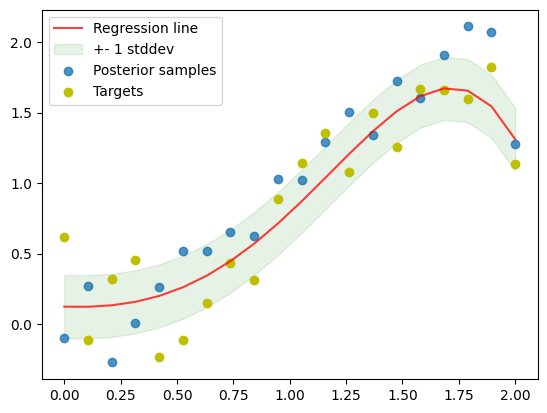

In [16]:
show_plot(X, m_preds, std_preds, ys_all, targets)

In the plot above, it's evident that the predicted targets closely align with the true line. This observation is due to the low variance of the prior (0.1), which serves as a form of regularization (similar to λ) by constraining the range of theta values to be centered around the mean of 0.

**Case B**):

1.   Prior Mean: [-1, 0.9, 0.7, -0.2, 0.2]
2.   Prior Variance: 0.1
3.   Noise Variance: 0.15
4.   Number of Data Points (N): 20



In [17]:
# Define parameters for Case B
noise_var = 0.15
alpha = 0.1
N = 20

Phi, targets, X = generate_data(noise_var, N)
m_preds, s_preds, std_preds, ys_all = Bayesian_Inference(noise_var, Phi, targets, alpha)

# Calculate Mean Squared Error (MSE)
mse_case_b = np.mean((targets - ys_all) ** 2)

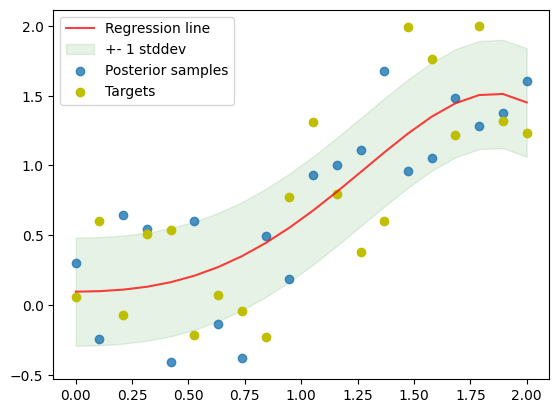

In [18]:
show_plot(X, m_preds, std_preds, ys_all, targets)

The introduction of noise in the y-values leads to an increase in variance in the model estimates. This increased variance, which incorporates the noise, is evident in our predictions. As a result, as seen in the plot above, our predictions display higher variance compared to the previous scenario.



---



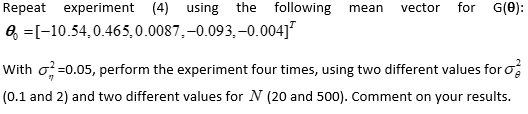

Case C):

1.   Prior Mean: [-10.54, 0.465, 0.0087, -0.093, -0.004]
2.   Prior Variance: 0.1
3.   Noise Variance: 0.05
4.   Number of Data Points (N): 20



In [19]:
# Define parameters for Case C
noise_var = 0.05
alpha = 0.1
N = 20
weights_true = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])

Phi, targets, X = generate_data(noise_var, N)
m_preds, s_preds, std_preds, ys_all = Bayesian_Inference(noise_var, Phi, targets, alpha)

# Calculate Mean Squared Error (MSE)
mse_case_c = np.mean((targets - ys_all) ** 2)

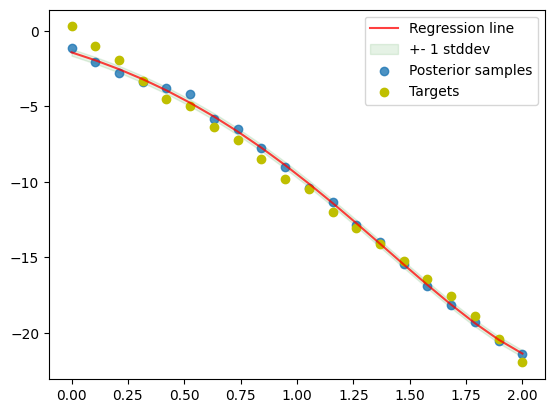

In [20]:
show_plot(X, m_preds, std_preds, ys_all, targets)

**Case D**):

1.   Prior Mean: [-10.54, 0.465, 0.0087, -0.093, -0.004]
2.   Prior Variance: 2
3.   Noise Variance: 0.05
4.   Number of Data Points (N): 20



In [21]:
# Define parameters for Case D
noise_var = 0.05
alpha = 2
N = 20
weights = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])

Phi, targets, X = generate_data(noise_var, N)
m_preds, s_preds, std_preds, ys_all = Bayesian_Inference(noise_var, Phi, targets, alpha)

# Calculate Mean Squared Error (MSE)
mse_case_d = np.mean((targets - ys_all) ** 2)

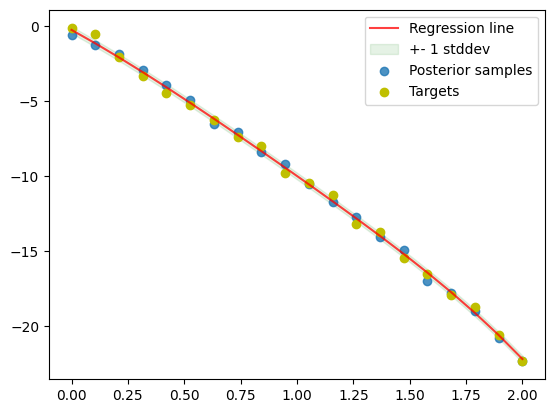

In [22]:
show_plot(X, m_preds, std_preds, ys_all, targets)

**Case E**):

1.   Prior Mean: [-10.54, 0.465, 0.0087, -0.093, -0.004]
2.   Prior Variance: 0.1
3.   Noise Variance: 0.05
4.   Number of Data Points (N): 500

In [23]:
# Define parameters for Case E
noise_var = 0.05
alpha = 0.1
N = 500
weights = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])

Phi, targets, X = generate_data(noise_var, N)
m_preds, s_preds, std_preds, ys_all = Bayesian_Inference(noise_var, Phi, targets, alpha)

# Calculate Mean Squared Error (MSE)
mse_case_e = np.mean((targets - ys_all) ** 2)

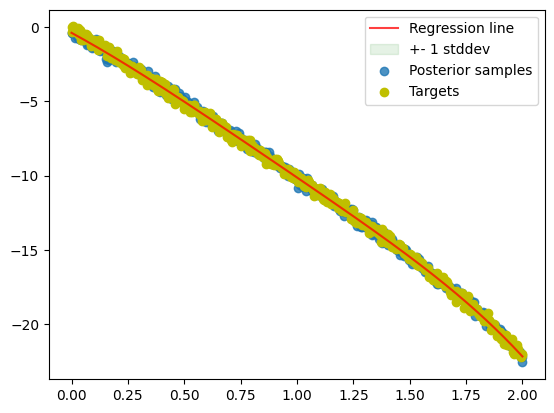

In [24]:
show_plot(X, m_preds, std_preds, ys_all, targets)

**Case F**):

1.   Prior Mean: [-10.54, 0.465, 0.0087, -0.093, -0.004]
2.   Prior Variance: 2
3.   Noise Variance: 0.05
4.   Number of Data Points (N): 500

In [25]:
# Define parameters for Case F
noise_var = 0.05
alpha = 2
N = 500
weights = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])

Phi, targets, X = generate_data(noise_var, N)
m_preds, s_preds, std_preds, ys_all = Bayesian_Inference(noise_var, Phi, targets, alpha)

# Calculate Mean Squared Error (MSE)
mse_case_f = np.mean((targets - ys_all) ** 2)

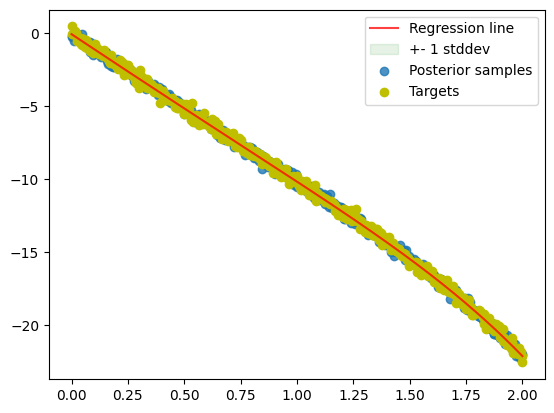

In [26]:
show_plot(X, m_preds, std_preds, ys_all, targets)

When we have a larger training dataset, the quality of our regression line improves significantly, and the Mean Squared Error (MSE) tends to approach that of Ridge Regression.

# **Expectation-Maximization**

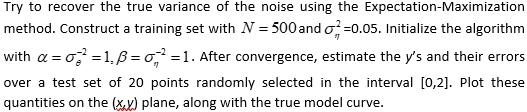

In [27]:
# Generate data
X = np.linspace(0, 2, num=500)
Phi = poly(X, poly_degree=5)
t_real = np.dot(Phi, weights_true)
noise = create_noise(var=0.05, mu=0, N=500)
y = t_real + noise
y = np.array(y).reshape(-1, 1)

# Initialize parameters
beta_init = np.random.rand(5)
sigma2_init = 1

# Define the E-step
def E_step(beta, sigma2, y, Phi):
    e = y - Phi @ beta.reshape(-1, 1)
    return e.T @ e / (2 * sigma2)

# Define the M-step
def M_step(beta, sigma2, e, Phi):
    beta = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
    sigma2 = e.T @ e / (2 * len(y))
    return beta, sigma2

# Run the EM algorithm
beta_est, sigma2_est = np.array(beta_init), np.array(sigma2_init)
likelihood_old = -np.inf
max_iterations = 1000
tolerance = 1e-5

for i in range(max_iterations):
    e = y - Phi @ beta_est.reshape(-1, 1)
    beta_est, sigma2_est = M_step(beta_est, sigma2_est, e, Phi)
    likelihood = E_step(beta_est, sigma2_est, y, Phi)

    if np.abs(likelihood - likelihood_old) < tolerance:  # Stopping criterion
        break
    likelihood_old = likelihood

print("Estimated Beta:", beta_est)
print("Estimated Sigma^2:", sigma2_est)

Estimated Beta: [[-10.496]
 [  0.506]
 [ -0.035]
 [ -0.088]
 [ -0.033]]
Estimated Sigma^2: [[0.023]]


Mean squared error on the test set: 84.18980486205496


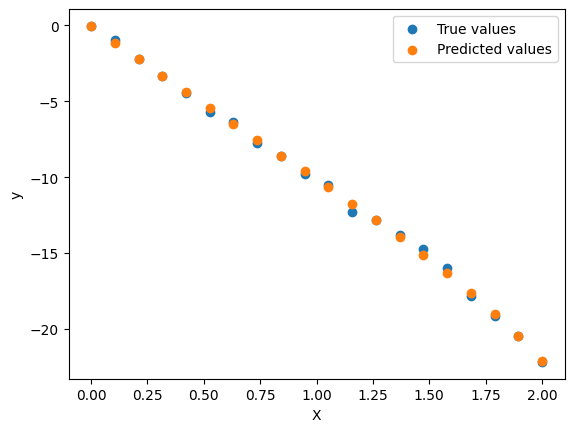

In [28]:
# Generate test data
X_test = np.linspace(0, 2, num=20)
Phi_test = poly(X_test, poly_degree=5)
t_real = np.dot(Phi_test, weights_true)
noise = create_noise(var=0.05, mu=0, N=20)
y_test = t_real + noise

# Predict y values on the test set using the estimated beta
y_pred = Phi_test @ beta_est.reshape(-1, 1)

# Calculate the errors
errors = y_pred - y_test

# Calculate the mean squared error
mse = np.mean(errors ** 2)

# Print the mean squared error
print("Mean squared error on the test set:", mse)

plt.scatter(Phi_test[:, 0], y_test, label='True values')
plt.scatter(Phi_test[:, 0], y_pred, label='Predicted values')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



---



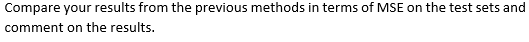

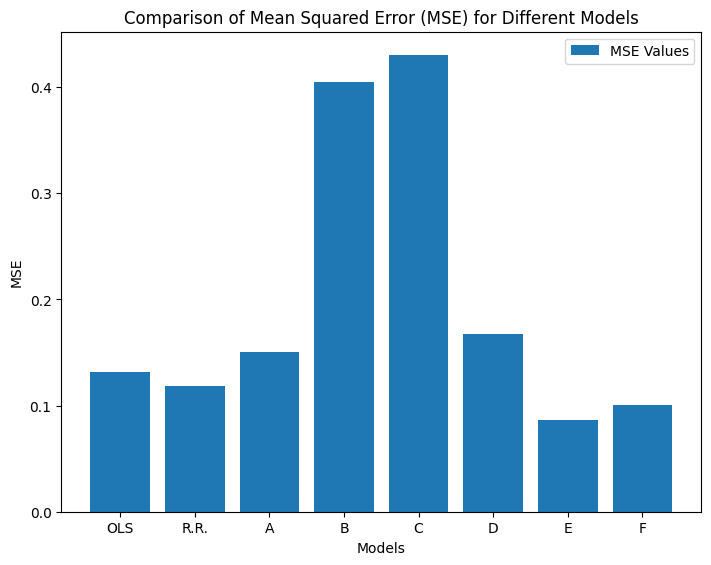

In [29]:
# Define the model labels and corresponding MSE values
x_axis = ['OLS', 'R.R.', 'Α', 'Β', 'C', 'D', 'E', 'F']
MSE_ALL = [mse_test_lsm, mse_test_rr, mse_case_a, mse_case_b, mse_case_c, mse_case_d, mse_case_e, mse_case_f]

# Create a bar chart
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_axis, MSE_ALL)

# Add labels and legend
plt.ylabel('MSE')
plt.xlabel('Models')
plt.legend(["MSE Values"])
plt.title("Comparison of Mean Squared Error (MSE) for Different Models")

# Show the plot
plt.show()

# **k-Nearest Neighbors**

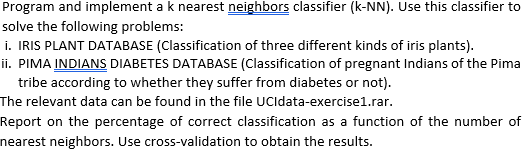

In [30]:
class KNNClassifier:
    """
    K-Nearest Neighbor Classifier

    Algorithm:
    - For a vector input X_test, calculate all distances to X_train.
    - Determine the k nearest neighbors by distance.
    - Predict the class of X_test using weighted voting mechanisms: uniform and
      inverse distance weighting.

    Parameters:
    - X_train: Training data points.
    - y_train: Corresponding class labels for training data.
    - k: Number of neighbors to consider.
    - voting_mechanism: Type of voting mechanism, either 'uniform' or 'inverse'.

    Attributes:
    - X_train: Training data points.
    - y_train: Corresponding class labels for training data.
    - k: Number of neighbors to consider.
    - voting: Type of voting mechanism ('uniform' or 'inverse').
    """

    def __init__(self, X_train=None, y_train=None, k=None, voting_mechanism=None):
        self.X_train = X_train
        self.y_train = y_train
        self.k = k
        self.voting = voting_mechanism

    def predict(self, X_test):
        """
        Predicts the class of each datapoint in X_test.

        Parameters:
        - X_test: Data points to be classified.

        Returns:
        - The prediction classes.
        """
        y_pred = []
        for x in X_test:
            neighbors = self.find_neighbors(x)
            prediction = self.predict_single(neighbors)
            y_pred.append(prediction)
        return y_pred

    def predict_single(self, neighbors):
        """
        For a given list of triples (x, distance, y), finds the winning class with
        the most "votes".

        Parameters:
        - neighbors: List of k triples (x_train, distance, class).

        Returns:
        - The winning class with the most votes.
        """
        votes = {}
        for x, distance, y in neighbors:
            if y in votes:
                if self.voting == 'uniform':
                    votes[y] += 1
                elif self.voting == 'inverse':
                    votes[y] += 1 / distance
            else:
                if self.voting == 'uniform':
                    votes[y] = 1
                elif self.voting == 'inverse':
                    votes[y] = 1 / distance
        return max(votes, key=votes.get)

    def find_neighbors(self, X_test):
        """
        Finds the k nearest neighbors by calculating the distance of X_test to
        all X_train points.

        Parameters:
        - X_test: Data points to be classified.

        Returns:
        - List of k triples (x_train, distance, class).
        """
        distances = []
        for i, x_train in enumerate(self.X_train):
            distance = self.euclidean_distance(X_test, x_train)
            distances.append((x_train, distance, self.y_train[i]))
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:self.k]
        return neighbors

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def scores(self, y_test, y_pred):
        """
        Calculate accuracy, F1-score, precision, recall, and confusion matrix.

        Parameters:
        - y_test: True class labels.
        - y_pred: Predicted class labels.

        Returns:
        - Accuracy, F1-score, precision, recall, and a confusion matrix.
        """
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)
        precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
        recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
        cm = confusion_matrix(y_test, y_pred)
        return accuracy, f1, precision, recall, cm


In [31]:
def kfold_cv(data, KNNClassifier, k):
    """
    Perform k-fold cross-validation to tune the hyperparameter k.

    Parameters:
    - data: The dataset containing features and labels.
    - KNNClassifier: An instance of the KNNClassifier class.
    - k: Range of k values for cross-validation.

    Returns:
    - final_scores: A Pandas DataFrame with cross-validation scores.
    - data_test: The test set for the final evaluation.
    """
    k_range = [i for i in range(1, k + 1, 2)]  # Choose odd k values
    scores = []

    for i in k_range:
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        accuracy_scores = []
        f1_scores = []
        precision_scores = []
        recall_scores = []
        confusion_matrices = []

        for train_index, test_index in kfold.split(data):
            X = data[:, :-1]
            y = data[:, -1]
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]

            KNNClassifier.X_train = X_train
            KNNClassifier.y_train = y_train
            KNNClassifier.k = i

            y_pred = KNNClassifier.predict(X_val)
            accuracy, f1, precision, recall, cm = KNNClassifier.scores(y_val, y_pred)
            accuracy_scores.append(accuracy)
            f1_scores.append(f1)
            precision_scores.append(precision)
            recall_scores.append(recall)
            confusion_matrices.append(cm)

        mean_accuracy = np.mean(accuracy_scores)
        mean_f1 = np.mean(f1_scores)
        mean_precision = np.mean(precision_scores)
        mean_recall = np.mean(recall_scores)
        std_f1 = np.std(f1_scores)

        scores.append([mean_accuracy, mean_f1, std_f1, mean_precision, mean_recall])

    final_scores = pd.DataFrame(scores, index=[f"k={i}" for i in range(1, k + 1, 2)],
                                columns=['Accuracy', 'F1', 'std_F1', 'Precision', 'Recall'])

    return final_scores

**Iris Plant Dataset Classification**

In [32]:
# Define the file path and the value of k
file_path = "https://drive.google.com/u/0/uc?id=1Dc5Q5SnruLJ8toenemVeRFPWf4Ifg_Ga&export=download"
k = 70

# Read the data from the file
df = pd.read_csv(file_path, header=None)

# Data preprocessing
# Transform the target labels to integers
le = preprocessing.LabelEncoder()
le.fit(df.iloc[:, -1])
df.iloc[:, -1] = le.transform(df.iloc[:, -1])

# Split the dataset into a training set and a test set
split = 0.85
df_train, df_test = np.split(df.sample(frac=1, random_state=42), [int(split * len(df))])
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

# We'll run k-fold Cross Validation to tune the hyperparameter k of the kNN Classifier
knn = KNNClassifier(voting_mechanism='uniform')
scores = kfold_cv(data_train, knn, k)

<ipython-input-32-2b7c0a3f6259>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = le.transform(df.iloc[:, -1])


Print the results. For each value of k, the scores represent the means of all scores from all combinations of folds.

In [33]:
print(scores)

      Accuracy        F1    std_F1  Precision    Recall
k=1   0.952615  0.937463  0.028603   0.964106  0.925847
k=3   0.968308  0.954879  0.043973   0.978921  0.943704
k=5   0.968308  0.961632  0.040722   0.976276  0.956402
k=7   0.968000  0.959921  0.049570   0.971886  0.955476
k=9   0.984000  0.980644  0.023789   0.987037  0.977143
k=11  0.976308  0.973548  0.022195   0.980976  0.969735
k=13  0.968308  0.964741  0.033675   0.970527  0.961402
k=15  0.968308  0.964741  0.033675   0.970527  0.961402
k=17  0.944615  0.929724  0.037541   0.956013  0.918439
k=19  0.944615  0.932553  0.034790   0.946876  0.925712
k=21  0.960615  0.957443  0.036746   0.965476  0.953995
k=23  0.944615  0.940043  0.053605   0.942143  0.941873
k=25  0.944615  0.932553  0.034790   0.946876  0.925712
k=27  0.936615  0.924241  0.044469   0.937381  0.919651
k=29  0.952615  0.942711  0.031990   0.955159  0.939045
k=31  0.944615  0.934169  0.033547   0.947222  0.932985
k=33  0.936923  0.926534  0.038109   0.942949  0

Plot Accuracy for different values of k. When using inverse distance weighting, closer points have more influence, making k less significant. In contrast, with uniform weighting, the choice of k plays a crucial role, as illustrated in the plots below.

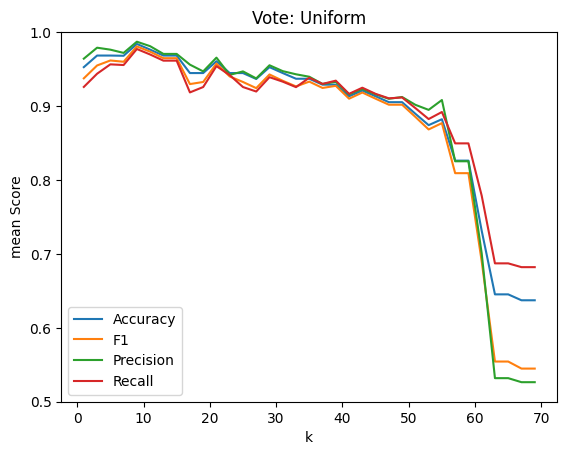

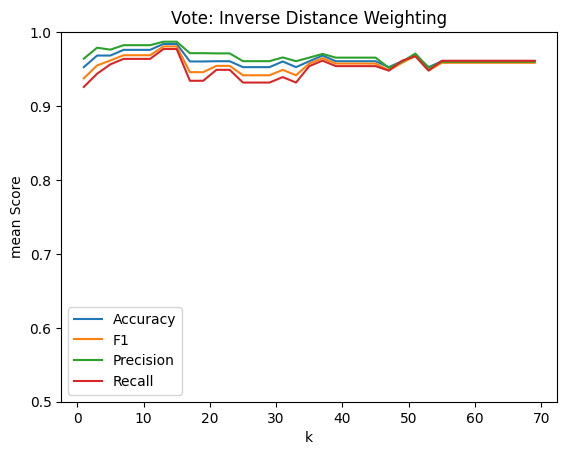

In [34]:
k_range = [i for i in range(1, k + 1, 2)]
Cs = ['Accuracy', 'F1', 'Precision', 'Recall']

# Voting mechanism is uniform
g = plt.figure(1)
for ind in Cs:
    plt.plot(k_range, scores[[ind]], label=ind)
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("mean Score")
plt.title("Vote: Uniform")
g.show()

# Voting mechanism is Inverse Distance Weight
# Let's create a new model for that
knn_b = KNNClassifier(voting_mechanism='inverse')
scores_b = kfold_cv(data_train, knn_b, k)
f = plt.figure(2)
for ind in Cs:
    plt.plot(k_range, scores_b[[ind]], label=ind)
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("mean Score")
plt.title("Vote: Inverse Distance Weighting")
f.show()

Next, we select the optimal value of 'k' from the scores obtained using the Inverse Distance Weighting model. We'll assume it's the 'k' value that resulted in the highest accuracy. Afterward, we proceed to test our model using the test data, which we initially set aside for this purpose.

In [35]:
best_k_index = scores_b.idxmax(axis=0)[0]  # find the max of every column in scores
k = int(re.findall(r'\d+', best_k_index)[0])  # get the index of max of Accuracy
print("Best k is: ", k)

Best k is:  13


In [36]:
# Separate data from targets in the test set
X_test = data_test[:,:-1]  # Features
y_test = data_test[:,-1]  # Target labels

# Use our final model with the chosen 'k' value
knn.k = k

# Predict the classes of the test set
y_pred = knn.predict(X_test)

# Calculate the model's performance scores
accuracy, f1, precision, recall, cm = knn.scores(y_test, y_pred)

In [37]:
# Print the results
print(f"K = {k}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)

K = 13
Accuracy: 0.96
F1-score: 0.96
Precision: 0.96
Recall: 0.97
Confusion Matrix:
[[ 5  0  0]
 [ 0  7  0]
 [ 0  1 10]]


**Pima Indians Diabetes Dataset Classification**

In [38]:
file_path = "https://drive.google.com/u/0/uc?id=1DaAEzJjMjrxjsAmin2NI4r3oxP8B19zd&export=download"
k = 70

# Read the file
df = pd.read_csv(file_path, header=None)

# Split the dataset into Training and Test sets
split = 0.85
df_train, df_test = np.split(df.sample(frac=1, random_state=42), [int(split * len(df))])
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

# Run k-fold Cross Validation to tune the hyperparameter k
knn = KNNClassifier(voting_mechanism='uniform')
scores = kfold_cv(data_train, knn, k)

Print the results. For each value of k, the scores represent the means of all scores from all combinations of folds.

In [39]:
print(scores)

      Accuracy        F1    std_F1  Precision    Recall
k=1   0.685484  0.652281  0.060528   0.652108  0.654283
k=3   0.703864  0.662630  0.057774   0.670380  0.659557
k=5   0.722325  0.679444  0.043927   0.691122  0.674442
k=7   0.720810  0.677568  0.043545   0.689840  0.671792
k=9   0.723864  0.679855  0.043215   0.693622  0.674041
k=11  0.733024  0.691766  0.054057   0.705839  0.685438
k=13  0.746765  0.700706  0.056748   0.725632  0.691671
k=15  0.746776  0.701973  0.062457   0.728016  0.692903
k=17  0.749935  0.699342  0.047733   0.733829  0.689306
k=19  0.737663  0.683616  0.043619   0.718734  0.674896
k=21  0.737628  0.684330  0.054576   0.720965  0.674560
k=23  0.739201  0.686037  0.039154   0.721194  0.676389
k=25  0.729971  0.668885  0.044819   0.713113  0.659687
k=27  0.730018  0.671439  0.025643   0.708299  0.662992
k=29  0.737686  0.681380  0.039460   0.717839  0.671685
k=31  0.723911  0.662924  0.036042   0.700699  0.654890
k=33  0.731544  0.672069  0.041271   0.712943  0

Plot Accuracy over different values of k. Observing that when we use inverse distance weighting to calculate the votes in the `find_neighbors()` function, it assigns more "power" to the votes of points closer to X_test. As a result, the choice of k value has a less significant impact on the results, and you consistently get the best possible results.

Conversely, if we simply add 1 for every vote, the importance of the k value becomes more evident. This distinction is illustrated in the plots below.


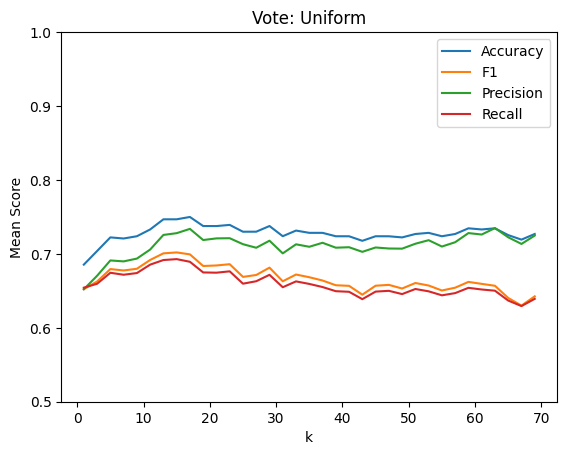

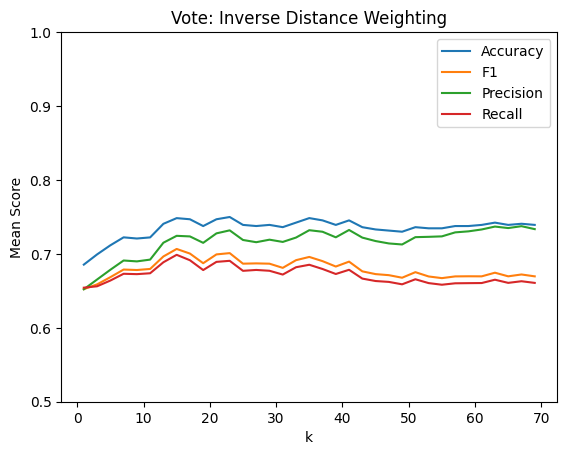

In [40]:
k_range = [i for i in range(1, k + 1, 2)]
Cs = ['Accuracy', 'F1', 'Precision', 'Recall']

# Voting mechanism is uniform
# Plot
g = plt.figure(1)
for ind in Cs:
    plt.plot(k_range, scores[ind], label=ind)
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Mean Score")
plt.title("Vote: Uniform")
plt.show()

# Voting mechanism is Inverse Distance Weight
# Let's create a new model for that
knn_b = KNNClassifier(voting_mechanism='inverse')
scores_b = kfold_cv(data_train, knn_b, k)

# Plot
f = plt.figure(2)
for ind in Cs:
    plt.plot(k_range, scores_b[ind], label=ind)
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Mean Score")
plt.title("Vote: Inverse Distance Weighting")
plt.show()

Next, we select the best k based on the scores from the Inverse Distance Weighting model. Let's assume the best k is the one with the highest accuracy. After determining the optimal k, we proceed to test our model using the initial test data that we set aside in the beginning.

In [41]:
best_k_index = scores_b.idxmax(axis=0)[0]  # find the max of every column in scores
k = int(re.findall(r'\d+', best_k_index)[0])  # get the index of max of Accuracy
print("Best k is: ", k)

Best k is:  23


In [42]:
# Separate data from target values in the test set
X_test = np.array(data_test[:, :-1])
y_test = np.array(data_test[:, -1])

# Set the final model with the chosen value of k
knn.k = k

# Predict the classes for the test set
y_pred = knn.predict(X_test)

# Calculate evaluation scores
accuracy, f1, precision, recall, cm = knn.scores(y_test, y_pred)

In [43]:
# Print the results
print(f"K={k}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Mean F1-score: {f1:.2f}")
print(f"Mean precision: {precision:.2f}")
print(f"Mean recall: {recall:.2f}")
print(f"Confusion Matrix:\n{cm}\n")

K=23
Accuracy: 0.76
Mean F1-score: 0.70
Mean precision: 0.80
Mean recall: 0.70
Confusion Matrix:
[[69  3]
 [25 19]]





---



# **MLE & Gaussian Kernel Density (Parzen Windows)**

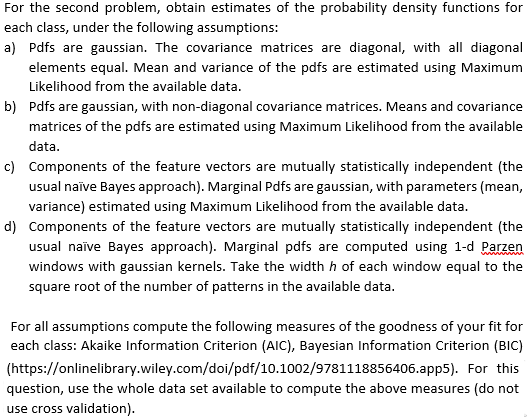

In [44]:
def mle(df, assumption=''):
    """
    Maximum Likelihood Estimation (MLE) for mean and covariance matrix.

    Args:
        df (DataFrame or ndarray): The dataset.
        assumption (str): The assumption for covariance estimation.
            'a': Equal variance on diagonal.
            'b': Full covariance matrix.
            'c': Diagonal covariance matrix.
            'd': Use Parzen Kernel Density Estimation.

    Returns:
        tuple: A tuple containing mean and covariance matrix.

    Raises:
        ValueError: If the assumption is not valid.

    Note:
        You can pass either a DataFrame or a NumPy array as 'df'.
    """
    if type(df) is not type(np.array([])):
        X = df.to_numpy()
    else:
        X = df

    # number of data
    n = X.shape[0]

    # dimensions
    m = X.shape[1]

    if assumption == 'a':
        mean = np.sum(X, axis=0) / n
        # estimate variance (transform to diagonal covariance with equal elements)
        var = np.sum(np.dot((X - mean).T, (X-mean))) / n*m
        tmp = [var for i in range(m)]
        cov = np.diag(tmp)

        return mean, cov

    elif assumption == 'b':
        # estimate mean
        mean = np.sum(X, axis=0) / n
        # estimate Covariance matrix
        sum = np.zeros((m,m))
        for x in X:
            a = np.outer((x-mean),(x-mean))  # (x-mu)*(x-mu).T
            sum = np.add(sum, a)
        cov = sum / n

        return mean, cov

    elif assumption == 'c':
        # estimate the mean of each column
        mean = np.sum(X, axis=0) / n
        # estimate the variance of each column
        var = np.var(X, axis=0)
        # form the diagonal covariance matrix
        cov = np.diag(var)

        return mean, cov

    elif assumption == 'd':

        return parzen_kde(X)


def parzen_kde(df):
    """
    Implements a Gaussian kernel density estimator.

    Args:
        df (DataFrame or ndarray): The dataset.

    Returns:
        ndarray: The probability density estimate for each data point.

    Note:
        You can pass either a DataFrame or a NumPy array as 'df'.
    """
    if type(df) is not type(np.array([])):
        X = df.to_numpy()
    else:
        X = df

    n_samples, n_features = X.shape
    h = np.sqrt(n_samples)  # width of the window
    pdf = np.zeros(n_samples)
    for i in range(n_samples):
        x = X[i, :]
        p = 1
        for j in range(n_features):
            p *= 1 / h * np.sum(np.exp(-(x[j] - X[:, j])**2 / (2 * h**2)))
            pdf[i] = p / n_samples

    return pdf


def is_diagonal(matrix):
    """
    Checks if a matrix is diagonal.

    Args:
        matrix (ndarray): The matrix to check.

    Returns:
        bool: True if the matrix is diagonal, False otherwise.
    """
    # Check if the matrix is square
    if matrix.shape[0] != matrix.shape[1]:
        return False
    # Check if the off-diagonal elements are all zero
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i != j and matrix[i, j] != 0:
                return False

    return True


def aic(df, assumption, pdf=None, mean=None, covmat=None):
    """
    Calculate the Akaike Information Criterion (AIC).

    Args:
        df (DataFrame or ndarray): The dataset.
        assumption (str): The assumption for covariance estimation.
        pdf (ndarray): Probability density estimate.
        mean (ndarray): Mean vector (optional).
        covmat (ndarray): Covariance matrix (optional).

    Returns:
        float: The AIC value.

    Note:
        You can pass either a DataFrame or a NumPy array as 'df'.
    """
    if type(df) is not type(np.array([])):
        X = df.to_numpy()
    else:
        X = df

    n = X.shape[0]
    if assumption == 'a':
        k = X.shape[1] + 1

    elif assumption == 'b':
        k = X.shape[1] * (X.shape[1] + 1) / 2

    else:
        k = X.shape[1]

    if pdf is not None:
        L = np.sum(np.log(pdf))
    else:
        L = np.sum(np.log(multivariate_normal.pdf(X, mean, covmat) ))

    return 2 * k - 2 * L


def bic(df, assumption, pdf=None, mean=None, covmat=None):
    """
    Calculate the Bayesian Information Criterion (BIC).

    Args:
        df (DataFrame or ndarray): The dataset.
        assumption (str): The assumption for covariance estimation.
        pdf (ndarray): Probability density estimate.
        mean (ndarray): Mean vector (optional).
        covmat (ndarray): Covariance matrix (optional).

    Returns:
        float: The BIC value.

    Note:
        You can pass either a DataFrame or a NumPy array as 'df'.
    """
    if type(df) is not type(np.array([])):
        X = df.to_numpy()
    else:
        X = df

    n = X.shape[0]
    if assumption == 'a':
        k = X.shape[1] + 1

    elif assumption == 'b':
        k = X.shape[1] * (X.shape[1] + 1) / 2

    else:
        k = X.shape[1]

    if pdf is not None:
        L = np.sum(np.log(pdf))
    else:
        L = np.sum(np.log(multivariate_normal.pdf(X, mean, covmat) ))
    # Calculate the BIC criterion
    bic = -2 * L + k*np.log(n)

    return bic / n


def normalization(data, type='min_max'):
    """
    Normalize the data using different methods.

    Args:
        data (ndarray): The data to normalize.
        type (str): The normalization method. 'min_max' by default.

    Returns:
        ndarray: The normalized data.

    Note:
        The function supports 'min_max' normalization by default.
    """
    data_min = data.min(axis=0)
    data_max = data.max(axis=0)
    data = (data - data_min) / (data_max - data_min)

    return data

**Pima Indians Dataset pre-processing**


In [45]:
file_path = "https://drive.google.com/u/0/uc?id=1DaAEzJjMjrxjsAmin2NI4r3oxP8B19zd&export=download"
df = pd.read_csv(file_path, header=None)

# Normalize
df = normalization(df)

# split classes to different dataframes
grouped = df.groupby(df.iloc[:,-1])
data_one = grouped.get_group(1)
data_zero = grouped.get_group(0)

# remove the targets from each dataframe
pos_class = data_one.drop(labels=8, axis=1)
neg_class = data_zero.drop(labels=8, axis=1)

**Distribution Estimation**



For each assumption:


*   Estimate the positive(1) and negative(0) class distribution
*   Calculate AIC and BIC to measure the goodness of fit

In [46]:
# Distribution estimation
mu_pos_a, cov_pos_a = mle(pos_class, assumption='a')
mu_pos_b, cov_pos_b = mle(pos_class, assumption='b')
mu_pos_c, cov_pos_c = mle(pos_class, assumption='c')
pdf_pos_d = parzen_kde(pos_class)
mu_neg_a, cov_neg_a = mle(neg_class, assumption='a')
mu_neg_b, cov_neg_b = mle(neg_class, assumption='b')
mu_neg_c, cov_neg_c = mle(neg_class, assumption='c')
pdf_neg_d = parzen_kde(neg_class)

# Akaike Information Criterion
aic_pos_a = aic(pos_class, assumption='a', mean=mu_pos_a, covmat=cov_pos_a)
aic_pos_b = aic(pos_class, assumption='b', mean=mu_pos_b, covmat=cov_pos_b)
aic_pos_c = aic(pos_class, assumption='c', mean=mu_pos_c, covmat=cov_pos_c)
aic_pos_d = aic(pos_class, assumption='d', pdf=pdf_pos_d)
aic_neg_a = aic(neg_class, assumption='a', mean=mu_neg_a, covmat=cov_neg_a)
aic_neg_b = aic(neg_class, assumption='b', mean=mu_neg_b, covmat=cov_neg_b)
aic_neg_c = aic(neg_class, assumption='c', mean=mu_neg_c, covmat=cov_neg_c)
aic_neg_d = aic(pos_class, assumption='d', pdf=pdf_neg_d)

# Bayesian Information Criterion
bic_pos_a = bic(pos_class, assumption='a', mean=mu_pos_a, covmat=cov_pos_a)
bic_pos_b = bic(pos_class, assumption='b', mean=mu_pos_b, covmat=cov_pos_b)
bic_pos_c = bic(pos_class, assumption='c', mean=mu_pos_c, covmat=cov_pos_c)
bic_pos_d = bic(pos_class, assumption='d', pdf=pdf_pos_d)
bic_neg_a = bic(neg_class, assumption='a', mean=mu_neg_a, covmat=cov_neg_a)
bic_neg_b = bic(neg_class, assumption='b', mean=mu_neg_b, covmat=cov_neg_b)
bic_neg_c = bic(neg_class, assumption='c', mean=mu_neg_c, covmat=cov_neg_c)
bic_neg_d = bic(pos_class, assumption='d', pdf=pdf_neg_d)

In [47]:
print('--Assumption a--')
print('--Positive Class (1)--')
print(f'AIC: {aic_pos_a:.2f}')
print(f'BIC: {bic_pos_a:.2f}')
print(f'Estimated mean: {mu_pos_a}')
print(f'Estimated Covariance Matrix:\n {cov_pos_a}')
print('----------------------------------------------------------')
print('--Negative Class (0)--')
print(f'AIC: {aic_neg_a:.2f}')
print(f'BIC: {bic_neg_a:.2f}')
print(f'Estimated mean: {mu_neg_a}')
print(f'Estimated Covariance Matrix:\n {cov_neg_a}\n\n')

print('--Assumption b--')
print('--Positive Class (1)--')
print(f'AIC: {aic_pos_b:.2f}')
print(f'BIC: {bic_pos_b:.2f}')
print(f'Estimated mean: {mu_pos_b}')
print(f'Estimated Covariance Matrix:\n {cov_pos_b}')
print('----------------------------------------------------------')
print('--Negative Class (0)--')
print(f'AIC: {aic_neg_b:.2f}')
print(f'BIC: {bic_neg_b:.2f}')
print(f'Estimated mean: {mu_neg_b}')
print(f'Estimated Covariance Matrix:\n {cov_neg_b}\n\n')

print('--Assumption c--')
print('--Positive Class (1)--')
print(f'AIC: {aic_pos_c:.2f}')
print(f'BIC: {bic_pos_c:.2f}')
print(f'Estimated mean: {mu_pos_c}')
print(f'Estimated Covariance Matrix:\n {cov_pos_c}')
print('----------------------------------------------------------')
print('--Negative Class (0)--')
print(f'AIC: {aic_neg_c:.2f}')
print(f'BIC: {bic_neg_c:.2f}')
print(f'Estimated mean: {mu_neg_c}')
print(f'Estimated Covariance Matrix:\n {cov_neg_c}\n\n')

--Assumption a--
--Positive Class (1)--
AIC: 6315.59
BIC: 23.69
Estimated mean: [0.286 0.71  0.581 0.224 0.119 0.524 0.202 0.268]
Estimated Covariance Matrix:
 [[2.973 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    2.973 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    2.973 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    2.973 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    2.973 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    2.973 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    2.973 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    2.973]]
----------------------------------------------------------
--Negative Class (0)--
AIC: 11171.50
BIC: 22.42
Estimated mean: [0.194 0.553 0.559 0.199 0.081 0.452 0.15  0.17 ]
Estimated Covariance Matrix:
 [[2.565 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    2.565 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    2.565 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    2.565 0.    0.    0.    0.   ]
 [0.    0.    0.    0.  

# **Bayes Classifiers**

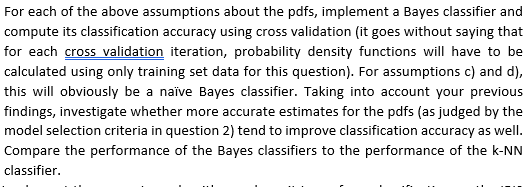

In [48]:
class BayesClassifier:
    """
    Bayes Classifier for conditional pdfs estimation.

    Parameters:
        - assumption (str): The assumption to use for parameter estimation ('a', 'b', 'c', or 'd').
        - pdf (list): List of precomputed probability density functions.

    Attributes:
        - classes: List of unique class labels.
        - parameters: List of estimated parameters for each class.
        - assumption: The selected assumption for parameter estimation.
        - pdf: List of precomputed PDFs.
    """
    def __init__(self, assumption='', pdf=None):
        self.classes = None
        self.parameters = []
        self.assumption = assumption
        self.pdf = []


    def fit(self, data):
        """
        Train the Classifier by finding the Gaussian distribution
        parameters of the data with MLE or using precomputed PDFs.

        Parameters:
        - data: Input training data.

        Returns:
        - None
        """
        X, y = self._preprocess_data(data)

        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y == c]
            if self.assumption == 'a':
                mu, cov = mle(X_c, 'a')
                self.parameters.append((mu, cov))
            elif self.assumption == 'b':
                mu, cov = mle(X_c, 'b')
                self.parameters.append((mu, cov))
            elif self.assumption == 'c':  # naive bayes
                mu, cov = mle(X_c, 'c')
                self.parameters.append((mu, cov))
            elif self.assumption == 'd':  # naive bayes
                pdf = parzen_kde(X_c)
                self.pdf.append(pdf)


    def predict(self, data):
        """
        Predict the classes of data using the fitted model.

        Parameters:
        - data: Input data to predict the classes for.

        Returns:
        - Predicted class labels.
        """
        # Split samples from targets
        X = data[:,:-1]
        y = data[:, -1]

        if len(self.pdf) != 0:
            class_posteriors = []
            for c, pdf in zip(self.classes, self.pdf):
                probabilities = []
                for i,x in enumerate(X):  # for each sample
                    # p(x|y)*p(y) we dont use the denominator since it won't affect results
                    likelihood = pdf[i]
                    prior = len(X[y == c])/len(X)
                    probability = likelihood * prior
                    probabilities.append(probability)
                class_posteriors.append(probabilities)
            class_posteriors = np.array(class_posteriors)
        else:
            class_posteriors = []
            for c, (mu,cov) in zip(self.classes, self.parameters):  # for each class
                probabilities = []
                for i,x in enumerate(X):  # for each sample
                    # p(x|y)*p(y) we dont use the denominator since it won't affect results
                    likelihood = multivariate_normal.pdf(x, mu, cov)
                    prior = len(X[y == c])/len(X)
                    probability = likelihood * prior
                    probabilities.append(probability)
                class_posteriors.append(probabilities)

            class_posteriors = np.array(class_posteriors)

        results = []
        for j,_ in enumerate(X):
            winning_class = 0
            max = class_posteriors[0][j]
            for i in range(1, self.classes.shape[0]):
                if (class_posteriors[i][j] > max):
                    winning_class = i
                results.append(winning_class)

        return np.array(results)

    def scores(self, y_test, y_pred):
        """
        Calculate accuracy, F1-score, precision, recall, and confusion matrix.

        Parameters:
        - y_test: Actual class labels.
        - y_pred: Predicted class labels.

        Returns:
        - Accuracy, F1-score, Precision, Recall, and a Confusion Matrix.
        """
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)
        precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
        recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

        return accuracy, f1, precision, recall, cm


    def _preprocess_data(self, data):
        """
        Split data into input features and target labels.

        Parameters:
        - data: Input data with features and labels.

        Returns:
        - X: Input features.
        - y: Target labels.
        """
        # split X and Y
        X = data[:,0:-1]
        y = data[:,-1]
        return X, y


def kfold_cv_(df, assum):
    """
    Perform k-fold cross-validation to tune the hyperparameter based on the given
    assumption.

    Parameters:
        df (pd.DataFrame): The dataset in a Pandas DataFrame.
        assumption (str): The assumption for parameter estimation.

    Returns:
        list: List of mean accuracy, mean F1-score, standard deviation of F1-score,
              mean precision, and mean recall.
    """
    Χ = df.to_numpy()

    # set up k-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # initialize lists to store the scores for each Fold.
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    confusion_matrices = []

    # Iterate through the folds
    for train_index, test_index in kfold.split(Χ):
        # split data to training and validation set
        data_train = Χ[train_index]
        data_val = Χ[test_index]

        # targets
        y_val = data_val[:,-1]

        # train
        clf = BayesClassifier(assumption=assum)
        clf.fit(data_train)

        # Validation step
        # Predict the classes of the test set
        y_pred = clf.predict(data_val)

        # calculate the Accuracy, F1-score, precision, recall and confusion mtrx.
        accuracy, f1, precision, recall, cm = clf.scores(y_val, y_pred)
        # append the scores and confusion matrix to the lists
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        confusion_matrices.append(cm)

    # compute the mean of scores (except of the confusion matrix)
    mean_accuracy = np.mean(accuracy_scores)
    mean_f1 = np.mean(f1_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    std_f1 = np.std(f1_scores)

    scores = [mean_accuracy, mean_f1, std_f1, mean_precision, mean_recall]

    return scores

In [49]:
file_path = "https://drive.google.com/u/0/uc?id=1DaAEzJjMjrxjsAmin2NI4r3oxP8B19zd&export=download"

# read file
df = pd.read_csv(file_path, header=None)

In [50]:
# get scores
accuracy_a, f1_a, _, precision_a, recall_a = kfold_cv_(df, assum='a')
accuracy_b, f1_b, _, precision_b, recall_b = kfold_cv_(df, assum='b')
accuracy_c, f1_c, _, precision_c, recall_c = kfold_cv_(df, assum='c')
accuracy_d, f1_d, _, precision_d, recall_d = kfold_cv_(df, assum='d')

In [51]:
# print results (scores are mean)
print("--Assumption a--")
print(f"Accuracy: {accuracy_a:.2f}")
print(f"F1-score: {f1_a:.2f}")
print(f"Precision: {precision_a:.2f}")
print(f"Recall: {recall_a:.2f}\n")

print("--Assumption b--")
# print results
print(f"Accuracy: {accuracy_b:.2f}")
print(f"F1-score: {f1_b:.2f}")
print(f"Precision: {precision_b:.2f}")
print(f"Recall: {recall_b:.2f}\n")

print("--Assumption c--")
# print results
print(f"Accuracy: {accuracy_c:.2f}")
print(f"F1-score: {f1_c:.2f}")
print(f"Precision: {precision_c:.2f}")
print(f"Recall: {recall_c:.2f}\n")

print("--Assumption d--")
# print results
print(f"Accuracy: {accuracy_d:.2f}")
print(f"F1-score: {f1_d:.2f}")
print(f"Precision: {precision_d:.2f}")
print(f"Recall: {recall_d:.2f}")

--Assumption a--
Accuracy: 0.65
F1-score: 0.39
Precision: 0.33
Recall: 0.50

--Assumption b--
Accuracy: 0.74
F1-score: 0.70
Precision: 0.71
Recall: 0.70

--Assumption c--
Accuracy: 0.75
F1-score: 0.72
Precision: 0.73
Recall: 0.72

--Assumption d--
Accuracy: 0.64
F1-score: 0.42
Precision: 0.50
Recall: 0.50


# **Multi-Layer Perceptron**

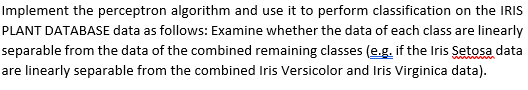

In [52]:
def perceptron(X, y, w, learning_rate=1):
    """Train a perceptron model on the given data.

    Parameters:
    - X (numpy.ndarray): Training data.
    - y (numpy.ndarray): Labels for the training data.
    - w (numpy.ndarray): Initial weights.
    - learning_rate (float): The learning rate.

    Returns:
    - w (numpy.ndarray): Final weights.
    - N (int): Number of iterations in which weights were updated.
    - status (str): Convergence status.
    """
    N = 0

    while True:
        flag = True

        for x, y_true in zip(X, y):
            y_pred = np.sign(np.dot(w, x))

            if y_pred != y_true:
                w += learning_rate * np.dot(y_true, x)
                flag = False
                N += 1

        if flag:
            status = 'Linearly separable because w*x*y>0 for all patterns (Accuracy=1)'
            return w, N, status
        else:
            X_norms = np.linalg.norm(X, ord=1, axis=1)
            max_norm = max(X_norms)

            sum_norms = 0
            for x in X[:, :-1]:
                sum_norms += np.linalg.norm(x, ord=2)

            if N > (sum_norms**2 / max_norm**2):
                status = 'Linearly unseparable because N > b**2 / D**2 (Accuracy < 1)'
                return w, N, status


def score(target, X, y):
    """Calculate accuracy and convergence status using the perceptron algorithm.

    Parameters:
    - target: The target label for class separation.
    - X (numpy.ndarray): Features.
    - y (numpy.ndarray): Labels.

    Returns:
    - accuracy (float): Accuracy of the classification.
    - N (int): Number of iterations in which weights were updated.
    - status (str): Convergence status.
    """
    y = np.where(y == target, 1, -1)
    threshold = np.ones((X.shape[0], 1))
    X = np.append(X, threshold, axis=1)
    w = np.zeros(X.shape[1])
    w, N, status = perceptron(X, y, w)
    y_pred = np.sign(np.dot(w, X.T))
    accuracy = np.mean(y_pred == y)

    return accuracy, N, status


**Iris Dataset**

In [53]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [54]:
# 0 = Setosa, 1 = Versicolor, 2 = Virginica

# Setosa vs Others
a = 0
accuracy, N, status = score(a, X, y)
print('Setosa vs Others:')
print(f'Accuracy={accuracy:.2f}')
print(f'N={N}')
print(f'{status}\n')

# Versicolor vs others
a = 1
accuracy, N, status = score(a, X, y)
print('Versicolor vs others:')
print(f'Accuracy={accuracy:.2f}')
print(f'N={N}')
print(f'{status}\n')

# Virginica vs others
a = 2
accuracy, N, status = score(a, X, y)
print('Virginica vs others:')
print(f'Accuracy={accuracy:.2f}')
print(f'N={N}')
print(f'{status}\n')

Setosa vs Others:
Accuracy=1.00
N=5
Linearly separable because w*x*y>0 for all patterns (Accuracy=1)

Versicolor vs others:
Accuracy=0.55
N=3028
Linearly unseparable because N > b**2 / D**2 (Accuracy < 1)

Virginica vs others:
Accuracy=0.97
N=3024
Linearly unseparable because N > b**2 / D**2 (Accuracy < 1)



In [55]:
!pip install plotly_express

In [56]:
import plotly_express as px
px.scatter_3d(iris.data, x=1, y=2, z=0, size=3,
              color=iris.target, color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})